Code to load word2vec generated with Glove algorithm.

In [2]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy as np

#glove2word2vec('../glove.6B.50d.txt', '../glove.6B.50d.word2vec.txt')
model = KeyedVectors.load_word2vec_format('../glove.6B.50d.word2vec.txt')

Example of wordvec

In [5]:
model['iphone']

array([ 1.2539   , -0.56673  ,  1.6319   ,  1.1865   , -0.48834  ,
        0.36259  , -0.82767  , -1.4428   ,  0.68535  ,  1.214    ,
       -0.037155 ,  0.11501  , -0.055208 , -0.66076  ,  0.62749  ,
        0.76278  , -1.859    ,  0.49287  ,  0.33943  , -0.65197  ,
        0.25558  , -0.22333  , -0.67652  ,  0.44986  ,  0.79696  ,
       -0.1786   , -0.0087023, -0.21125  ,  0.1148   , -0.46096  ,
        1.4063   ,  0.060144 , -0.2344   ,  0.79268  ,  0.54177  ,
       -0.51637  ,  0.54205  ,  0.19579  , -1.4308   , -2.0538   ,
        0.82389  , -0.56078  , -0.96512  ,  0.45632  ,  0.72266  ,
        0.38879  ,  0.91906  , -0.41994  ,  0.11835  ,  0.29072  ],
      dtype=float32)

Normalized wordvec

In [6]:
norm_iphone = model['iphone'] / np.linalg.norm(model['iphone'])
norm_iphone

array([ 0.22105967, -0.09991319,  0.28770018,  0.20917718, -0.0860932 ,
        0.06392377, -0.1459163 , -0.2543623 ,  0.12082561,  0.21402538,
       -0.00655034,  0.020276  , -0.00973304, -0.11649045,  0.11062503,
        0.13447635, -0.32773736,  0.08689184,  0.05984072, -0.1149408 ,
        0.04505816, -0.03937256, -0.1192689 ,  0.07930928,  0.1405022 ,
       -0.03148676, -0.0015342 , -0.03724289,  0.02023897, -0.08126618,
        0.24792741,  0.01060325, -0.04132418,  0.13974765,  0.09551279,
       -0.09103483,  0.09556215,  0.03451732, -0.2522467 , -0.3620802 ,
        0.14524989, -0.09886421, -0.17014842,  0.08044815,  0.12740327,
        0.06854278,  0.16202813, -0.07403444,  0.02086483,  0.05125326],
      dtype=float32)

Normalized vectors of words phone, ipad and dog

In [7]:
norm_ipad = model['ipad'] / np.linalg.norm(model['ipad'])
norm_dog = model['dog'] / np.linalg.norm(model['dog'])
norm_dog

array([ 0.02265932, -0.0798284 , -0.11859708, -0.05704763,  0.14516331,
        0.11114346, -0.22202346, -0.08263817,  0.23680305, -0.11687827,
        0.00080232,  0.10884624,  0.13289501,  0.09728604,  0.09993525,
       -0.03788972,  0.03707252,  0.18813533, -0.24658066, -0.11893671,
       -0.07818988,  0.06917597,  0.15891165,  0.1555255 ,  0.09367142,
       -0.3637471 , -0.21619806,  0.0876196 ,  0.08623426, -0.14064708,
        0.32261944,  0.05698793, -0.12702227,  0.13305351, -0.01584917,
        0.07640521,  0.02692441, -0.09291185,  0.05228028, -0.15313154,
       -0.01774356,  0.04954256, -0.13342609,  0.17198068,  0.2573463 ,
       -0.10576064,  0.00869485, -0.1813857 ,  0.1473432 ,  0.07928909],
      dtype=float32)

Definition of thermometer function

In [8]:
import math

def thermometer(word_vec, min_=-1.0, max_=1.0, n=20):
    vec = []
    for v in word_vec:
        t = (max_ - min_)/n
        rang = []
        for i in np.arange(min_ + t, max_, t):
            if v > i:
                rang.append(1)
            else:
                break
        rang.extend([0] * (n-len(rang)-1))
        vec.extend(rang)
    return np.array(vec)

In [9]:
thermometer(norm_iphone)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [10]:
thermometer(norm_ipad)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

Tests with cosine distance

In [11]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
cosine(norm_ipad, norm_iphone)

0.059447646141052246

In [15]:
cosine(norm_ipad, norm_dog)

0.7320146560668945

In [16]:
cosine(norm_iphone, norm_dog)

0.7466427683830261

In [17]:
cosine(thermometer(norm_ipad), thermometer(norm_dog))

0.0770753217996184

In [18]:
cosine(thermometer(norm_iphone), thermometer(norm_dog))

0.07403092281884505

In [19]:
cosine(thermometer(norm_iphone), thermometer(norm_ipad))

0.021806326179795943

In [22]:
model.similarity('iphone', 'phone') # in original space

0.5980113384781769

In [24]:
model.most_similar('iphone') # in original space

[('ipad', 0.9405524730682373),
 ('smartphone', 0.9002014398574829),
 ('ipod', 0.8585913777351379),
 ('android', 0.8474240899085999),
 ('smartphones', 0.8404892683029175),
 ('macintosh', 0.8069723844528198),
 ('3gs', 0.7897009253501892),
 ('playstation', 0.7869682312011719),
 ('handsets', 0.7849521040916443),
 ('app', 0.7825643420219421)]

Plot in 2d dimension with PCA

In [25]:
words = ['iphone', 'ipad', 'car', 'airplane', 'dog', 'cat', 'bat', 'pizza', 'one', 'two', 'three', 'four', 'five', 'rio', 'brazil','tokyo','japan']

words_original = [model[i] for i in words]
words_bin = [thermometer(model[i]) for i in words]

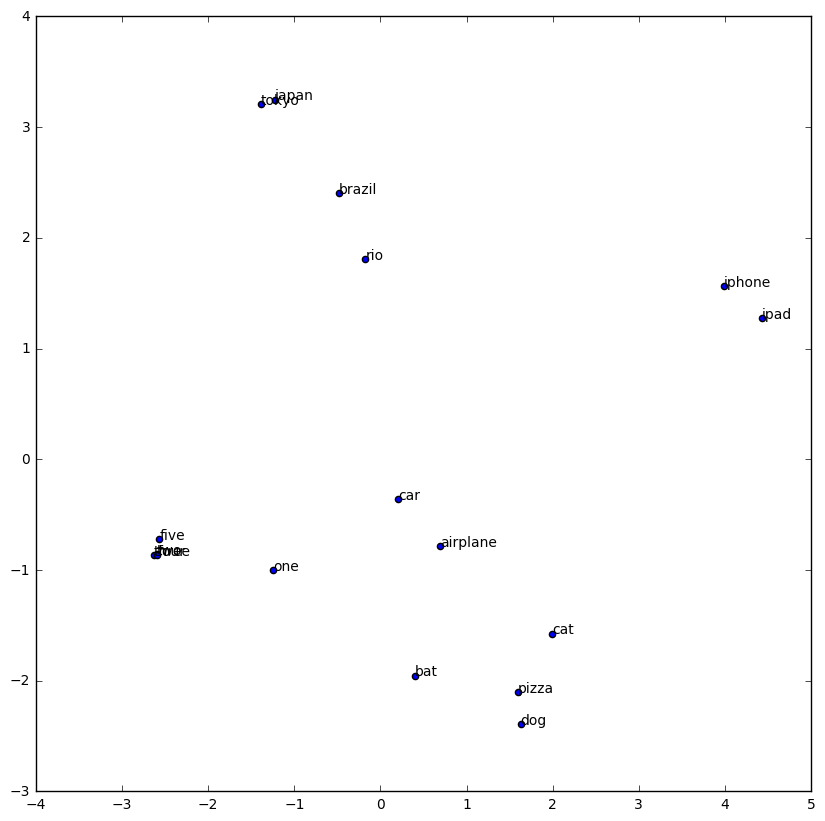

In [26]:
X = words_original
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig = pyplot.figure(figsize=(10,10))
for i, word in enumerate(words):
    pyplot.scatter(result[i, 0], result[i, 1])
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

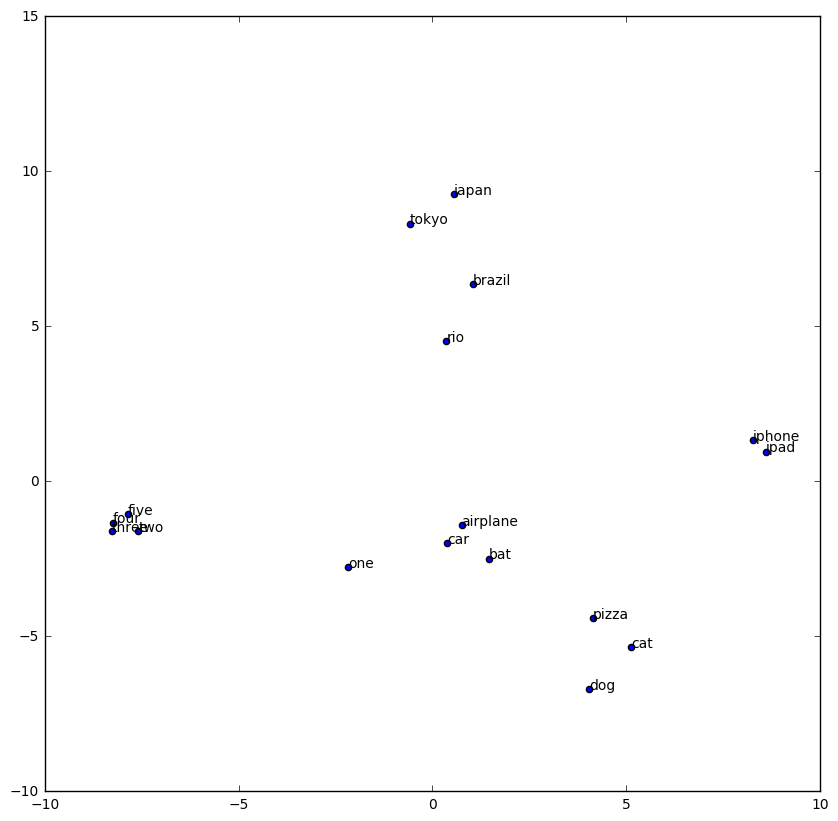

In [27]:
X = words_bin
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig = pyplot.figure(figsize=(10,10))
for i, word in enumerate(words):
    pyplot.scatter(result[i, 0], result[i, 1])
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [28]:
words = ['brasilia', 'brazil', 'amsterdam','netherlands','tokyo','japan','france', 'paris','portugal','lisboa']

words_original = [model[i] for i in words]
words_bin = [thermometer(model[i]) for i in words]

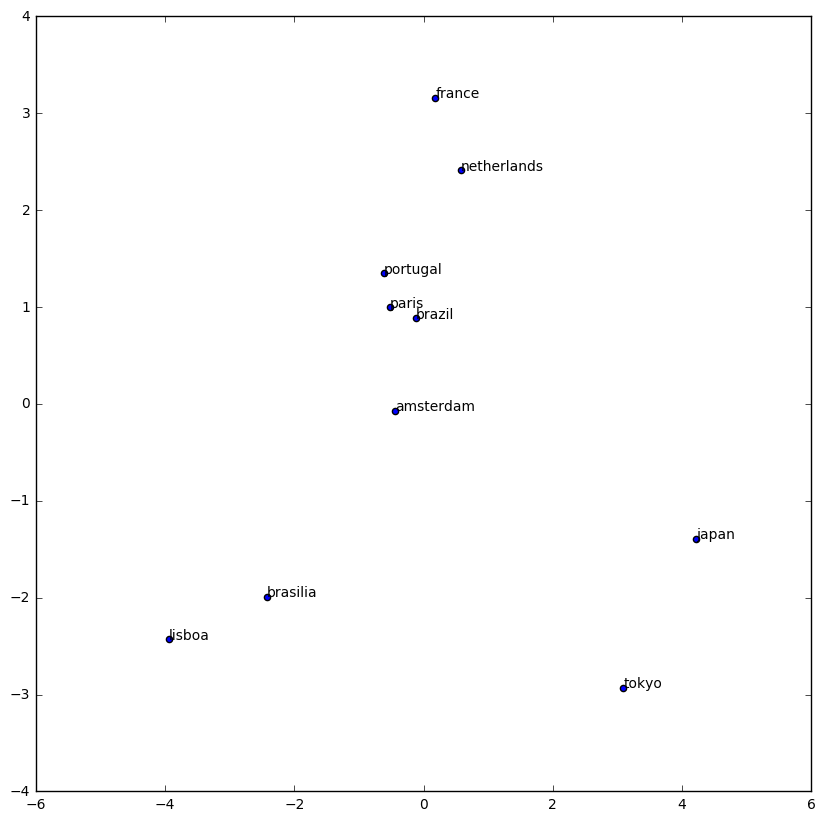

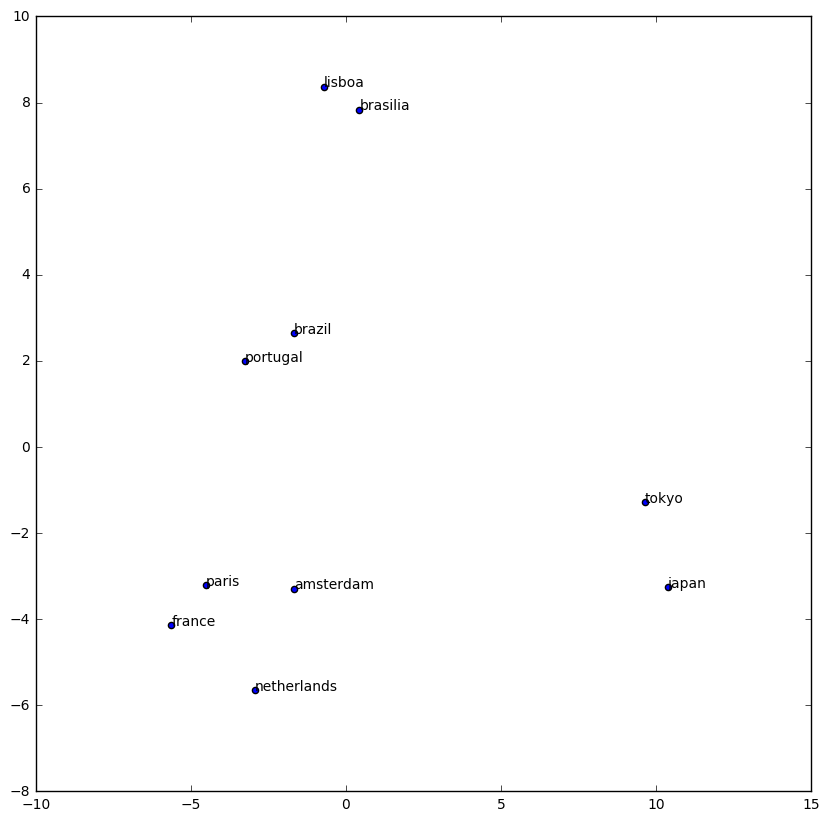

In [29]:
X = words_original
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig = pyplot.figure(figsize=(10,10))
for i, word in enumerate(words):
    pyplot.scatter(result[i, 0], result[i, 1])
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

X = words_bin
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig = pyplot.figure(figsize=(10,10))
for i, word in enumerate(words):
    pyplot.scatter(result[i, 0], result[i, 1])
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [30]:
words_bin = [thermometer(model[i], n=5) for i in words]

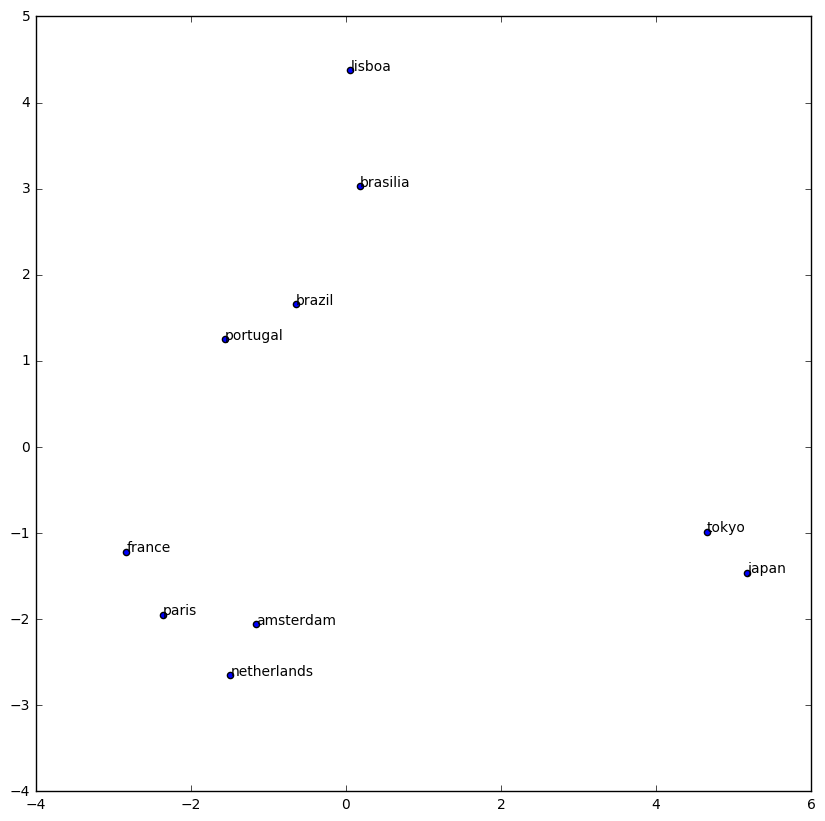

In [31]:
X = words_bin
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig = pyplot.figure(figsize=(10,10))
for i, word in enumerate(words):
    pyplot.scatter(result[i, 0], result[i, 1])
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Image representation of word in 32x32 shape. Added 11 zero bits at the end.

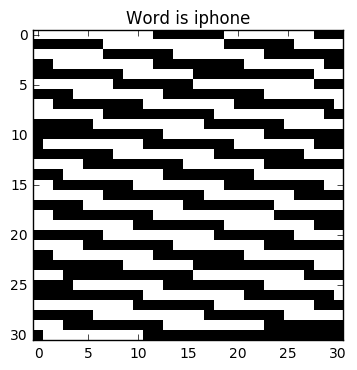

In [33]:
pixels = np.array(np.append(thermometer(norm_iphone), [0]*11), dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((31, 31))

# Plot
pyplot.title('Word is {label}'.format(label='iphone'))
pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
pyplot.show()

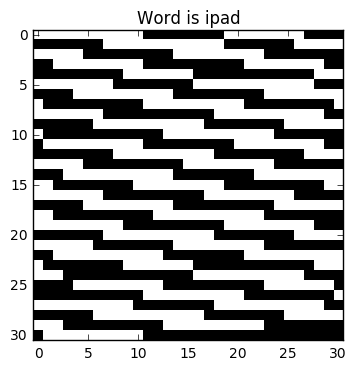

In [34]:
pixels = np.array(np.append(thermometer(norm_ipad), [0]*11), dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((31, 31))

# Plot
pyplot.title('Word is {label}'.format(label='ipad'))
pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
pyplot.show()

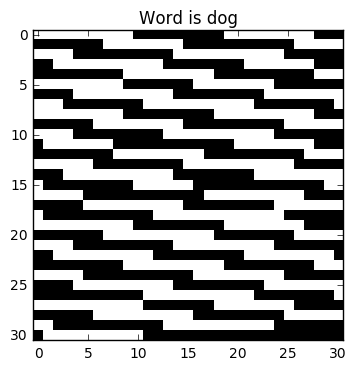

In [35]:
pixels = np.array(np.append(thermometer(norm_dog), [0]*11), dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((31, 31))

# Plot
pyplot.title('Word is {label}'.format(label='dog'))
pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
pyplot.show()

Image representation of word in 50x19.

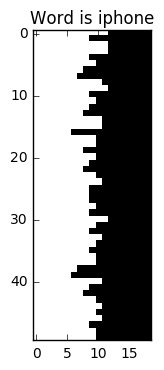

In [37]:
pixels = np.array(thermometer(norm_iphone), dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((50, 19))

# Plot
pyplot.title('Word is {label}'.format(label='iphone'))
pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
pyplot.show()

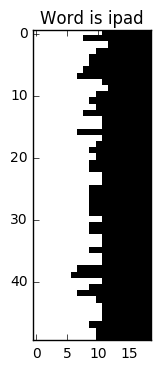

In [38]:
pixels = np.array(thermometer(norm_ipad), dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((50, 19))

# Plot
pyplot.title('Word is {label}'.format(label='ipad'))
pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
pyplot.show()

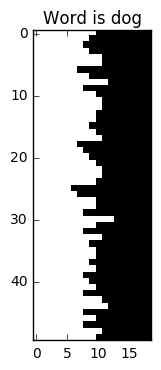

In [39]:
pixels = np.array(thermometer(norm_dog), dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((50, 19))

# Plot
pyplot.title('Word is {label}'.format(label='dog'))
pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
pyplot.show()

Document representation

In [52]:
docs = ['i like iphone ipad and all apple products',
        'ipad is a good device',
        'my dog ate my homework',
        'my dog is the best pet',
        'my cat is black',
        'what kind of pet do you have',
        'do we have homework to do',
        'the final exam is tomorrow',
        ]

In [53]:
docs_vec = []
for doc in docs:
    v = np.array([0] * 50)
    w = doc.split(' ')
    for j in w:
        v = np.add(v, model[j])
    v = v / np.linalg.norm(v) # normalized
    docs_vec.append(v)

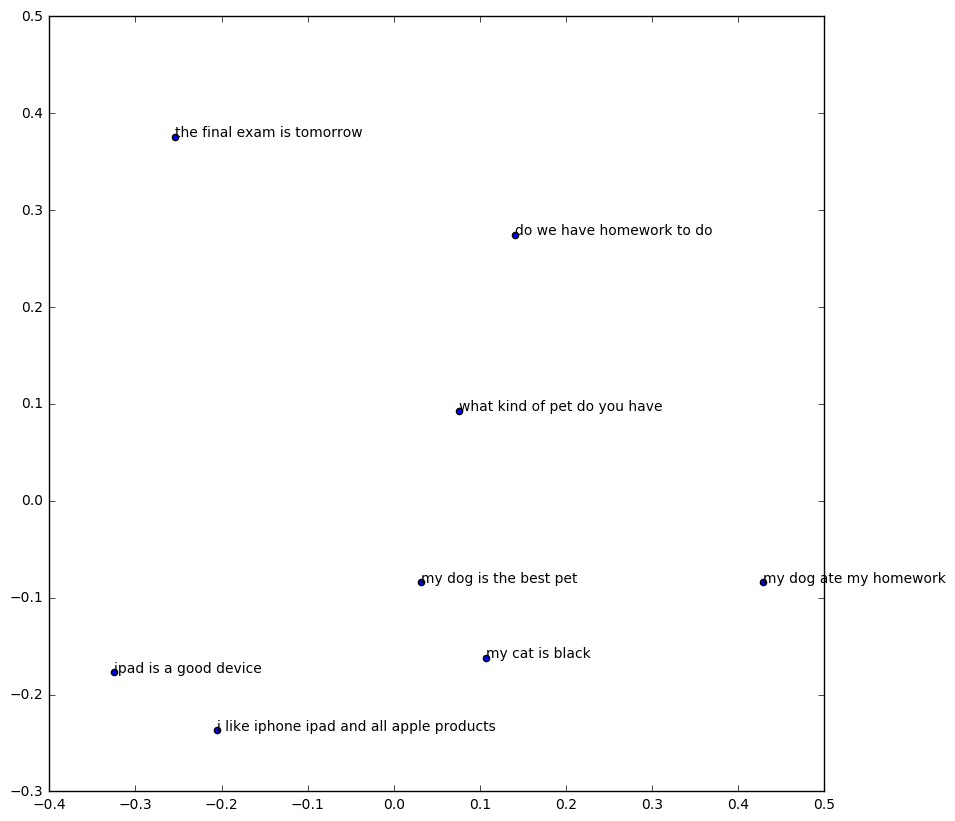

In [54]:
X = docs_vec
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
fig = pyplot.figure(figsize=(10,10))
for i, word in enumerate(docs):
    pyplot.scatter(result[i, 0], result[i, 1])
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Document image representation in 50x19

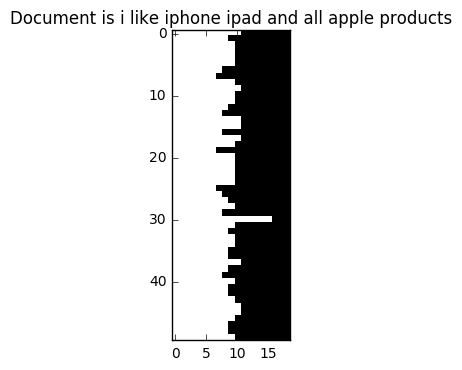

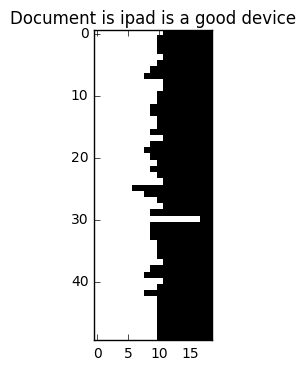

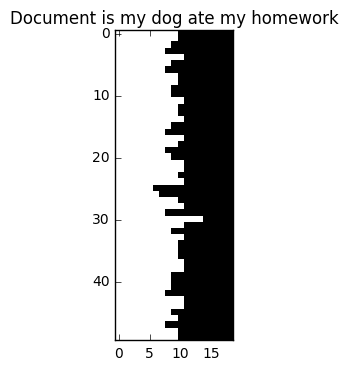

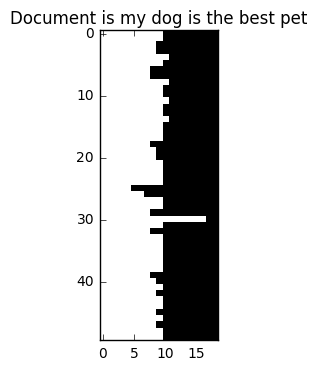

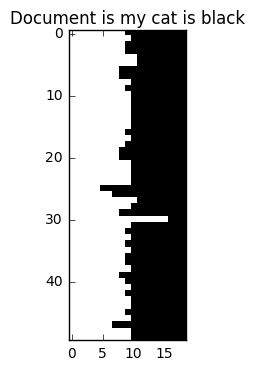

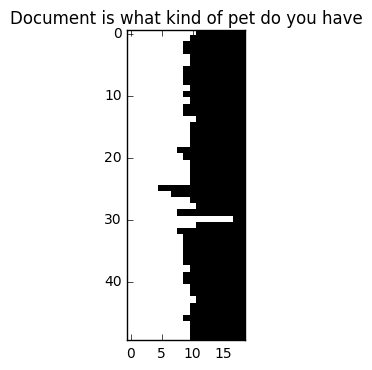

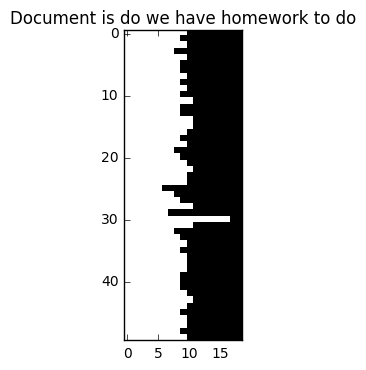

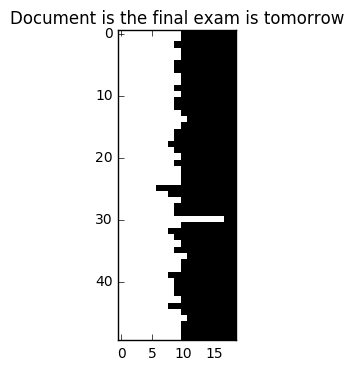

In [62]:
for i in range(len(docs_vec)):
    pixels = np.array(thermometer(docs_vec[i]), dtype='uint8')
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((50, 19))

    # Plot
    pyplot.title('Document is {label}'.format(label=docs[i]))
    pyplot.imshow(pixels, cmap='gray', interpolation='nearest')
    pyplot.show()